In [366]:
%config IPCompleter.greedy=True

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
import datetime


In [369]:
train_values = pd.read_csv("/content/training_set_values.csv")
train_labels = pd.read_csv("/content/training_set_labels.csv")
test_values = pd.read_csv("/content/test_set_values.csv")

In [370]:
train_data = training_values.join(other = training_labels.set_index('id'), on='id')

In [371]:
train_data.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pu

In [372]:
train_data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [373]:
train_data = train_data.drop(['id'], axis=1)

In [374]:
train_data['longitude'] = train_data['longitude'].replace(0, train_data['longitude'].mean())

In [375]:
train_data.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,35.116960,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,2.573963,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,29.607122,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.354079,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [376]:
train_data['permit'] = train_data['permit'].astype(str)
train_data['public_meeting'] = train_data['public_meeting'].astype(str)

In [377]:
 categorical_columns = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting','scheme_management', 
       'scheme_name', 'permit','extraction_type', 'extraction_type_group', 'extraction_type_class',
       'payment_type','source_class', 'waterpoint_type','water_quality',  'management',
        'management_group', 'payment','quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'status_group',
       'waterpoint_type_group']

In [378]:
for column in categorical_columns:
     if column not in train_data.columns:
          continue  
     train_data[column] = train_data[column].fillna('n/a')

In [379]:
def encode_cat_cols(dataset):
    encoders = {} 
    for column in categorical_columns:
        if column not in dataset.columns:
            continue
            
        le = LabelEncoder()
        le.fit(dataset[column])

        dataset[column] = le.transform(dataset[column])
        encoders[column]= le
        
    return encoders

In [380]:
encoders = encode_cat_cols(train_data)

In [381]:
date_columns = ['date_recorded']

In [382]:
timestamp_fmt="%Y-%m-%d"
for column in date_columns:
     train_data[column] = [ datetime.datetime.strptime(x, timestamp_fmt).timestamp() for x in train_data[column]]

In [383]:
# convert_date_cols_to_epoch(train_data)

In [384]:

train_data.drop('recorded_by', axis=1, inplace=True)

In [385]:
drop_columns = ['region', 
                    'extraction_type_group', 'extraction_type_class', 
                    'management_group', 
                    'payment', 
                    'quality_group', 
                    'quantity', 
                    'source_type', 'source_class', 
                    'waterpoint_type_group']
train_data.drop(drop_columns,1, inplace=True)
train_data = StandardScaler().fit_transform(train_data)

In [386]:
X , y= dataset.iloc[:, :-1],dataset.iloc[:, -1]
train_test_split(X, y, test_size=0.1, random_state = 0)

[       amount_tsh  date_recorded  ...  source  waterpoint_type
 8946         20.0   1.360800e+09  ...       3                1
 57060        50.0   1.363565e+09  ...       3                1
 32911         0.0   1.300234e+09  ...       8                2
 55899         0.0   1.359936e+09  ...       8                1
 48756         0.0   1.300838e+09  ...       7                4
 ...           ...            ...  ...     ...              ...
 45891     10000.0   1.301011e+09  ...       6                6
 52416         0.0   1.311638e+09  ...       3                4
 42613         0.0   1.364170e+09  ...       8                1
 43567         0.0   1.310774e+09  ...       6                1
 2732          0.0   1.299370e+09  ...       7                6
 
 [53460 rows x 28 columns],
        amount_tsh  date_recorded  ...  source  waterpoint_type
 11524         0.0   1.302566e+09  ...       8                1
 16731         0.0   1.300925e+09  ...       7                6
 48776    

In [387]:
X_train, X_test, y_train, y_test = split_dataset(dataset)

In [388]:
def print_accuracy(models_result, model_name, clf, X_test, y_test):
    accuracy = clf.score(X_test, y_test)

    models_result[model_name] = accuracy
    print(f'"{model_name}" has accuracy: {accuracy}') 

In [389]:
def plot_features_importances(classifier, X_train):
    series = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=True)
    series = series.plot(kind='barh', figsize=(10,10))
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.show()

In [390]:
def random_forest(X_train, y_train):
    clf = RandomForestClassifier(max_depth=25, n_estimators = 42*5, criterion = 'entropy', random_state = 0)
    clf.fit(X_train, y_train)
    return clf

"Random forest" has accuracy: 0.8183501683501684


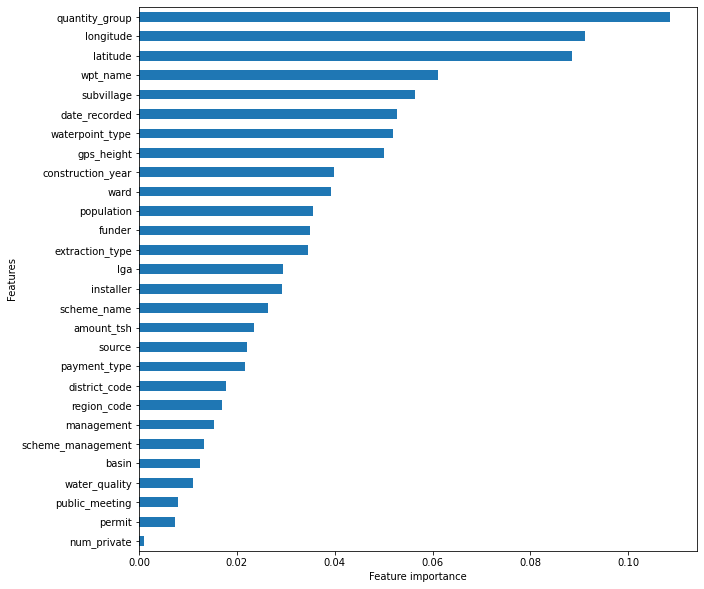

In [391]:
rf_clf = random_forest(X_train, y_train)
update_result_print(models_result, 'Random forest', rf_clf, X_test, y_test)
plot_features_importances(rf_clf, X_train)

In [392]:
#define a function to do all the data transforms done for tht train dataset
def data_transform(data):
    id_col = data['id']
    data = data.drop(['id'], axis=1)
    data['longitude'] = data['longitude'].replace(0, data['longitude'].mean())
    data['permit'] = data['permit'].astype(str)
    data['public_meeting'] = data['public_meeting'].astype(str) 
    categorical_columns = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting','scheme_management', 
       'scheme_name', 'permit','extraction_type', 'extraction_type_group', 'extraction_type_class',
       'payment_type','source_class', 'waterpoint_type','water_quality',  'management',
        'management_group', 'payment','quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'status_group',
       'waterpoint_type_group']

    for column in categorical_columns:
     if column not in data.columns:
          continue  
     data[column] = data[column].fillna('n/a')
    encode_cat_cols(data)
    timestamp_fmt="%Y-%m-%d"
    for column in date_columns:
     data[column] = [ datetime.datetime.strptime(x, timestamp_fmt).timestamp() for x in data[column]]
    data.drop('recorded_by', axis=1, inplace=True)
    drop_columns = ['region', 
                    'extraction_type_group', 'extraction_type_class', 'quality_group',
                    'management_group', 'quantity','source_type', 
                    'payment', 'source_class', 'waterpoint_type_group']
    data.drop(drop_columns,1, inplace=True)
    data = StandardScaler().fit_transform(data) 
    
    return data, id_col

In [396]:
X, id_column = data_transform(test_values)
pred_y = rf_clf.predict(X)

In [397]:
status_group_encoder = encoders['status_group']
real_decoded_y = pd.DataFrame(status_group_encoder.inverse_transform(pred_y), columns = ['status_group'])
result = pd.concat([id_column, real_decoded_y], axis=1)
result.to_csv("/content/submisssion.csv", index=False)